In [141]:
# importing required libraries

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [34]:
# importing target URL

property_details = pd.read_csv('property_for_rent.csv')

In [3]:
property_details.head()

,Unnamed: 0,property,address,bedroom,toilet,parking_space,prices
0,0,semi-detached duplex for rent,"Ikota, Lekki,",4,5,3,"3,500,000"
1,1,flat for rent,Divine Homes,3,4,2,"1,500,000"
2,2,terraced duplex for rent,Maitama Distr,4,5,3,"10,000,000"
3,3,flat for rent,Off Palace Ro,3,4,2,"4,500,000"
4,4,terraced duplex for rent,Osborne Fores,4,NaN,NaN,"10,000,000"


In [36]:
titles = property_details.columns

In [37]:
titles

Index(['property', 'address', 'bedroom', 'toilet', 'parking_space', 'prices'], dtype='object')

In [6]:
property_details.shape

(1050, 7)

In [35]:
#removing the attribute('Unnamed: 0') from the dataset because it is unimportant

property_details.drop('Unnamed: 0',axis=1,inplace=True)

In [10]:
#checking for null values

property_details.isnull().sum()

property           0
address            0
bedroom            0
toilet           409
parking_space    409
prices             0
dtype: int64

In [8]:
property_details

,property,address,bedroom,toilet,parking_space,prices
0,semi-detached duplex for rent,"Ikota, Lekki,",4,5,3,"3,500,000"
1,flat for rent,Divine Homes,3,4,2,"1,500,000"
2,terraced duplex for rent,Maitama Distr,4,5,3,"10,000,000"
3,flat for rent,Off Palace Ro,3,4,2,"4,500,000"
4,terraced duplex for rent,Osborne Fores,4,NaN,NaN,"10,000,000"
...,...,...,...,...,...,...
1045,mini flat for rent,Off Ada Georg,2,NaN,NaN,"600,000"
1046,flat for rent,Banana Island,3,3,2,"85,000"
1047,semi-detached duplex for rent,"Orchid Road,",4,NaN,NaN,"3,500,000"
1048,terraced duplex for rent,"Bourdillon, O",4,5,5,"15,000,000"


In [9]:
property_details['parking_space'][4]

nan

In [12]:
#checking for unique values in each attribute

property_details['parking_space'].unique()

array(['3 ', '2 ', nan, 'ets10 ', 'paces600 ', '8 ', '5 ', '10 '],
      dtype=object)

In [13]:
property_details['bedroom'].unique()

array(['4 ', '3 ', '12', 'Se', '2 ', '1 ', 'De'], dtype=object)

In [15]:
property_details['toilet'].unique()

array(['5', '4', nan, 'ms16 ', 'Parking ', '3', '5 '], dtype=object)

In [18]:
#confirming the data types of each attribute

property_details.dtypes

property         object
address          object
bedroom          object
toilet           object
parking_space    object
prices           object
dtype: object

In [19]:
property_details['prices'][2]

'10,000,000'

In [80]:
#converting the string value to integer value in the "price" attribute

#property_details['prices']= property_details.prices.str.replace(',' , '').astype(int)

In [76]:
property_details['prices'].dtypes

dtype('int32')

In [81]:
#converting "nan" and other wrong values from the dataset to a "numpy NaN"

property_details_refill = property_details.replace(['nan','ets10 ', 'paces600 ', 'Se', 'De','ms16','Parking '], np.NaN)

In [82]:
#converting the data set to munpy

numpy_data = property_details_refill.to_numpy()


In [83]:
#replacing the numpy NaN values to the most frequent value in each dataset

imputer = SimpleImputer(missing_values=np.NaN, strategy="most_frequent")

In [84]:
property_details_clean = imputer.fit_transform(numpy_data)

In [85]:
#converting the non missing dataset back to a dataframe

property_details_allclean = pd.DataFrame(data=property_details_clean, columns=titles)

In [86]:
property_details_allclean

,property,address,bedroom,toilet,parking_space,prices
0,semi-detached duplex for rent,"Ikota, Lekki,",4,5,3,3500000
1,flat for rent,Divine Homes,3,4,2,1500000
2,terraced duplex for rent,Maitama Distr,4,5,3,10000000
3,flat for rent,Off Palace Ro,3,4,2,4500000
4,terraced duplex for rent,Osborne Fores,4,4,3,10000000
...,...,...,...,...,...,...
1045,mini flat for rent,Off Ada Georg,2,4,3,600000
1046,flat for rent,Banana Island,3,3,2,85000
1047,semi-detached duplex for rent,"Orchid Road,",4,4,3,3500000
1048,terraced duplex for rent,"Bourdillon, O",4,5,5,15000000


In [73]:
# confirming that there are no more missing values in the dataset

property_details_allclean.isnull().sum()

property         0
address          0
bedroom          0
toilet           0
parking_space    0
prices           0
dtype: int64

In [89]:
# confirming that there are no more missing values in the dataset

property_details_allclean.describe()

,property,address,bedroom,toilet,parking_space,prices
count,1050,1050,1050,1050,1050,1050
unique,9,22,5,5,5,19
top,flat for rent,Maitama Distr,4,4,3,3500000
freq,300,102,493,707,748,163


In [90]:
property_details_allclean['parking_space'].unique()

array(['3 ', '2 ', '8 ', '5 ', '10 '], dtype=object)

In [91]:
#converting the below attributes to an integer value

property_details_allclean['parking_space'] = property_details_allclean.parking_space.astype(int)
property_details_allclean['bedroom'] = property_details_allclean.bedroom.astype(int)
property_details_allclean['toilet'] = property_details_allclean.bedroom.astype(int)

In [94]:
property_details_allclean['prices'] = property_details_allclean.prices.astype(int)

In [95]:
#confirming the datatypes after the conversion above

property_details_allclean.dtypes

property         object
address          object
bedroom           int32
toilet            int32
parking_space     int32
prices            int32
dtype: object

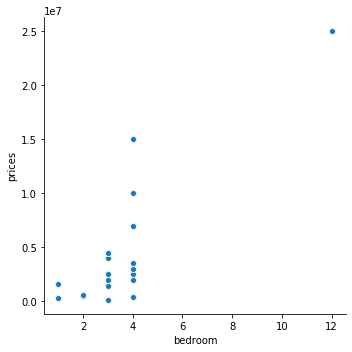

In [189]:
#This graph proves that the more the bedrooms of an apartment, the higher the rent price of the apartment

sns.relplot(x='bedroom', y='prices', data=property_details_allclean)

In [127]:
#converting the address attribute to figures that will allow for correlation analysis

add = property_details_allclean['address'].unique()

for i,address in enumerate(add):
#     print(i)
#     print(add)
    property_details_allclean.replace(address,i,inplace=True)

In [129]:
#correlation analysis
#This shows that there is a huge correlation between bedrooms and toilets. This is so because in most cases, each bedroom has a toilet in it.
#Also a strong correlation between prices and bedroom. This is so because the more the bedrooms, the more expensive the apartment will be

property_details_allclean.corr(method="pearson")

,address,bedroom,toilet,parking_space,prices
address,1.000000,-0.309413,-0.309413,0.294171,-0.191911
bedroom,-0.309413,1.000000,1.000000,0.010700,0.800579
toilet,-0.309413,1.000000,1.000000,0.010700,0.800579
parking_space,0.294171,0.010700,0.010700,1.000000,0.037678
prices,-0.191911,0.800579,0.800579,0.037678,1.000000


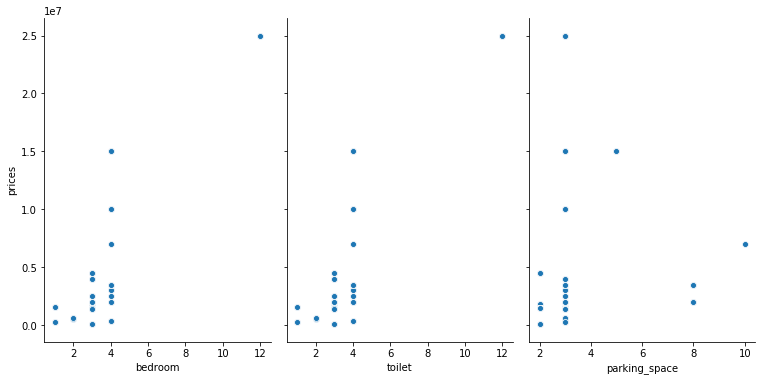

In [121]:
#relationship plot between all the attributes in the dataset in respect to rent prices 

sns.pairplot(property_details_allclean, x_vars=['bedroom','toilet','parking_space'], y_vars='prices', height=5, aspect=0.7)

In [142]:
#setting "prices" to be the target variable and setting to y

y = property_details_allclean['prices']

In [143]:
#setting the relavant variables to x

x = property_details_allclean.drop(['prices','property','address'], axis=1)

In [144]:
y.shape

(1050,)

In [145]:
x.shape

(1050, 3)

In [146]:
#converting the x variable to numpy

x = x.to_numpy()

In [147]:
#converting the y variable to numpy

y = y.to_numpy()

In [148]:
#calling linear regression for application

reg = LinearRegression()

In [171]:
#reg.fit(x,y)

In [172]:
#splitting the dataset into 2 for training and for testing purpose

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=1)

In [173]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(787, 3)
(263, 3)
(787,)
(263,)


In [174]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [175]:
print(reg.intercept_)

-4296970.734434562


In [176]:
print(reg.coef_)

[ 2.30378992e+18 -2.30378992e+18  1.50152000e+05]


In [182]:
y_new = reg.predict(x_train)

In [183]:
y_new

array([ 3472013.26556544,  1032333.26556544,  5911181.26556544,
        5911181.26556544,  5911181.26556544,  3321861.26556544,
        1032333.26556544,  3321861.26556544,  5911181.26556544,
        5911181.26556544,  6661941.26556544,  3321861.26556544,
        5911181.26556544,  5911181.26556544,  3321861.26556544,
        5911181.26556544,  6661941.26556544,  1032333.26556544,
        5911181.26556544,  5911181.26556544,  6211485.26556544,
        6211485.26556544,  5911181.26556544,  5911181.26556544,
        3472013.26556544,  4222773.26556544,  5911181.26556544,
        4222773.26556544,  3472013.26556544,  3472013.26556544,
       -1407090.73443456,  5911181.26556544, -1407090.73443456,
       25427597.26556544, -1407090.73443456,  1032333.26556544,
       -1407090.73443456,  3321861.26556544,  5911181.26556544,
        3472013.26556544,  5911181.26556544,  5911181.26556544,
        5911181.26556544,  4222773.26556544,  3321861.26556544,
        6661941.26556544,  5911181.26556

In [185]:
y_train

array([ 4000000,   500000,   350000,  3500000,  3000000,  1500000,
         500000,    85000,  3500000, 10000000,  3500000,  1500000,
       15000000, 10000000,  4500000, 15000000,  3500000,   600000,
       15000000,  3500000, 15000000, 15000000,  3500000,  3500000,
        4000000,  2000000,  3500000,  2000000,  1400000,  1400000,
         300000,   350000,   300000, 25000000,  1600000,   600000,
         300000,  4500000, 10000000,  4000000, 10000000,  3500000,
        3500000,  2000000,  1500000,  3500000, 10000000, 25000000,
       25000000, 15000000, 25000000,  1500000,  3500000,  2500000,
        4000000,  2000000,  3500000, 15000000,   500000, 25000000,
       15000000,   500000, 15000000,  3000000,    85000,  2500000,
       15000000,  3000000,   500000, 15000000,   500000,   600000,
        3500000,  4000000,  3500000,  1600000,   600000,  3000000,
         500000,  3500000,   600000,  1500000,   600000,  1400000,
         500000, 10000000,   350000,   600000,  7000000,  2500

In [186]:
reg.score(x_train,y_train)

0.6472256663056176